### Import necessary libraries

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

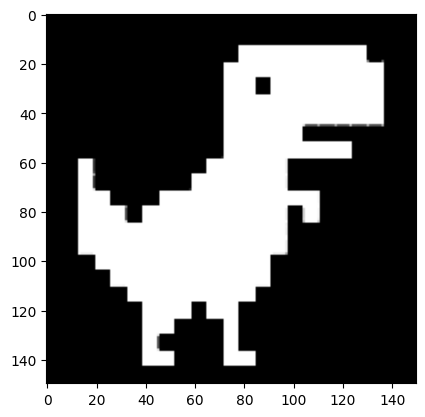

In [ ]:
path2 = "./assets/sample.png"
path2 = "./assets/dino.png"
img1 = cv.imread(path2)
plt.imshow(img1)

### Read the image in original and grayscale format and convert it to binary format via thresholding

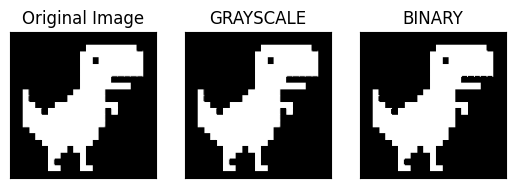

In [16]:
img = cv.imread(path2)
gray = cv.imread(path2, cv.IMREAD_GRAYSCALE)
ret,thresh1 = cv.threshold(gray,100,255,cv.THRESH_BINARY)
titles = ['Original Image', 'GRAYSCALE', 'BINARY']
images = [img, gray, thresh1]

for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

### Create a duplicate of the image

In [17]:
thresh_copy = thresh1.copy()

In [18]:
thresh1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(150, 150), dtype=uint8)

In [19]:
thresh_copy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(150, 150), dtype=uint8)

In [20]:
# identify the dimensions of image to traverse it
rows, cols = thresh_copy.shape[0], thresh_copy.shape[1]
# initialise label value to 0
label = 0
# dictionary to maintain relation between labels if it exists 
equivalency_dict = {}

In [21]:
label_matrix = [[0 for _ in range(rows)] for _ in range(cols)]

for i in range(rows):
    for j in range(cols):
        try:
            if thresh_copy[i][j] == 255:
                label_matrix[i][j] = 1
        except Exception as e:
            print(f"Exception at ({i}, {j}): {e}")

In [22]:
# traverse the image row-wise
for i in range(rows):
  for j in range(cols):
    # mark the pixel and it's top and left neighbour
    curr_pixel = label_matrix[i][j]
    top = label_matrix[i-1][j] if i > 0 else 0
    left = label_matrix[i][j-1] if j > 0 else 0
    
    # if the current pixel is part of foreground
    if curr_pixel == 1:
      # if the pixel is not connected to any component 
      if top == 0 and left == 0:
        # update label when new component discovered
        label += 1
        # mark the pixel with label
        label_matrix[i][j] = label
        # add the relation to dict
        equivalency_dict[label] = label

      elif top != 0 and left == 0:
        label_matrix[i][j] = top
            
      elif top == 0 and left != 0:
        label_matrix[i][j] = left

      else:  # Both top and left are nonzero
        min_label = min(top, left)
        max_label = max(top, left)
        # label the pixel with minimum value
        label_matrix[i][j] = min_label
        # add the relation between the max_label and min_label into dict
        if equivalency_dict[int(max_label)] > int(min_label):
          equivalency_dict[int(max_label)] = int(min_label)


### Dictionary showing various equivalencies 

In [23]:
equivalency_dict

{1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3}

In [24]:
# Function to find root label
def find_root(label, eq_dict):
    while eq_dict[label] != label:
        label = eq_dict[label]
    return label

# Create minimal equivalency dict
minimal_equivalency_dict = {}
for key in equivalency_dict:
    root = find_root(key, equivalency_dict)
    minimal_equivalency_dict[key] = root

# Also ensure that all root values point to themselves
for val in minimal_equivalency_dict.values():
    minimal_equivalency_dict[val] = val

print("Minimal Equivalency Dict:")
minimal_equivalency_dict

Minimal Equivalency Dict:


{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1}

### Re-traverse the image to update the label based on equivalency dict

In [25]:
for i in range(rows):
  for j in range(cols):
    # mark the pixels
    curr_pixel = label_matrix[i][j]
    top = label_matrix[i-1][j] if i > 0 else 0
    left = label_matrix[i][j-1] if j > 0 else 0
    
    # if the current pixel is part of foreground
    if curr_pixel != 0:
      # update the label
      connected_label = minimal_equivalency_dict[curr_pixel]
      label_matrix[i][j] = connected_label

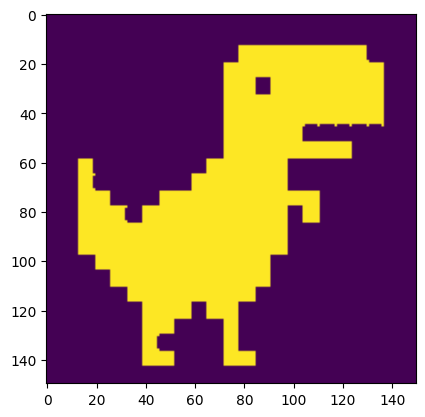

In [26]:
plt.imshow(label_matrix)